In [1]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 216 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=3951546e3355021327a2c5a84150d20dbad5dc7c53f95c2f6b9c3adbfba648a7
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# raw data 바꿔가면서 분석
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터.csv', index_col = 0, encoding = 'cp949')
raw_data = raw_data.drop("REFYM", axis = 1)

# 분석에 이용할 컬럼 바꾸고 싶으면 meaning list 수정
meaning_list_app = raw_data.columns.tolist()[48:]
raw_data["유동인구"] = raw_data["승차인원"]+raw_data["하차인원"]

meaning_list = ['유동인구','FAR', 'RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT','단독주택','공동주택','제1종근린생활시설','제2종근린생활시설','업무시설','의료시설','노유자시설','종교시설','교육연구시설','자동차관련시설','창고시설','문화및집회시설','공장','위험물저장및처리시설','동.식물관련시설','판매시설','숙박시설','운동시설','분뇨.쓰레기처리시설','자원순환관련시설','근린생활시설','방송통신시설','교육연구및복지시설','운수시설','판매및영업시설','위락시설','교정및군사시설','수련시설',
 '장례시설','발전시설','공공용시설','관광휴게시설','야영장시설','묘지관련시설','다세대주택']
data= raw_data.loc[:, meaning_list]
data = data.dropna(axis=0)




#클러스터링 포함
cl_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/클러스터데이터0.csv', index_col = 0, encoding = 'cp949')
data = data.loc[cl_data.index.tolist()]

In [4]:
data.shape

(91, 42)

In [5]:
cl_data.shape

(91, 7)

In [6]:
data.head()

유동인구        FAR  RESDT_AREA_RT  COMRC_AREA_RT  \
가락시장역         1787972.0  40.378767          0.369          0.610   
강남역           8728872.0  84.523328          0.308          0.625   
강동역           1934150.0  30.109276          0.492          0.203   
경복궁(정부서울청사)역  2086308.0  18.637365          0.475          0.400   
고속터미널역        7981652.0  92.135465          0.479          0.399   

              MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT    단독주택   공동주택  \
가락시장역                   0.021            0.0        0.000    32.0  201.0   
강남역                     0.068            0.0        0.000    73.0  103.0   
강동역                     0.305            0.0        0.000  1037.0  545.0   
경복궁(정부서울청사)역            0.125            0.0        0.000   783.0   97.0   
고속터미널역                  0.007            0.0        0.115    11.0  105.0   

              제1종근린생활시설  ...  위락시설  교정및군사시설  수련시설  장례시설  발전시설  공공용시설  관광휴게시설  \
가락시장역              65.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
강남역                93.0  ...   5.0      0.0   0.0   0.0   0.0    0.0     0.0   
강동역               130.0  ...   2.0      0.0   0.0   0.0   0.0    0.0     0.0   
경복궁(정부서울청사)역      177.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
고속터미널역             34.0  ...   0.0      0.0   0.0  12.0   0.0    0.0     0.0   

              야영장시설  묘지관련시설  다세대주택  
가락시장역           0.0     0.0    0.0  
강남역             0.0     0.0    0.0  
강동역             0.0     0.0    0.0  
경복궁(정부서울청사)역    0.0     0.0    0.0  
고속터미널역          0.0     0.0    0.0  

[5 rows x 42 columns]

In [7]:
data.describe()

유동인구         FAR  RESDT_AREA_RT  COMRC_AREA_RT  \
count  9.100000e+01   91.000000      91.000000      91.000000   
mean   2.582866e+06   39.178458       0.333659       0.496407   
std    2.008591e+06   31.527604       0.153811       0.205073   
min    2.211280e+05    3.382883       0.000000       0.117000   
25%    1.147101e+06   21.591298       0.280500       0.351000   
50%    2.054978e+06   32.417942       0.372000       0.459000   
75%    3.425827e+06   47.175171       0.447000       0.575000   
max    9.667626e+06  199.051496       0.523000       1.000000   

       MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT         단독주택        공동주택  \
count        91.000000      91.000000    91.000000    91.000000   91.000000   
mean          0.108604       0.013593     0.047769   461.978022  181.527473   
std           0.105697       0.045425     0.103091   446.062327  147.801544   
min           0.000000       0.000000     0.000000     0.000000    0.000000   
25%           0.031000       0.000000     0.000000    71.000000   61.500000   
50%           0.085000       0.000000     0.000000   311.000000  166.000000   
75%           0.165500       0.000000     0.008500   683.500000  276.500000   
max           0.537000       0.216000     0.442000  2050.000000  557.000000   

        제1종근린생활시설  ...       위락시설    교정및군사시설       수련시설       장례시설  발전시설  \
count   91.000000  ...  91.000000  91.000000  91.000000  91.000000  91.0   
mean   221.000000  ...   3.010989   0.010989   0.175824   0.142857   0.0   
std    221.483283  ...   5.286239   0.104828   0.876780   1.261141   0.0   
min      0.000000  ...   0.000000   0.000000   0.000000   0.000000   0.0   
25%     43.500000  ...   0.000000   0.000000   0.000000   0.000000   0.0   
50%    151.000000  ...   0.000000   0.000000   0.000000   0.000000   0.0   
75%    342.500000  ...   4.000000   0.000000   0.000000   0.000000   0.0   
max    979.000000  ...  21.000000   1.000000   8.000000  12.000000   0.0   

       공공용시설     관광휴게시설  야영장시설  묘지관련시설  다세대주택  
count   91.0  91.000000   91.0    91.0   91.0  
mean     0.0   0.021978    0.0     0.0    0.0  
std      0.0   0.147424    0.0     0.0    0.0  
min      0.0   0.000000    0.0     0.0    0.0  
25%      0.0   0.000000    0.0     0.0    0.0  
50%      0.0   0.000000    0.0     0.0    0.0  
75%      0.0   0.000000    0.0     0.0    0.0  
max      0.0   1.000000    0.0     0.0    0.0  

[8 rows x 42 columns]

In [8]:
lst = data.describe().loc['max']
col_list = lst[lst.values>100].index.tolist()
col_list = col_list + ['RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT']
col_list

['유동인구',
 'FAR',
 '단독주택',
 '공동주택',
 '제1종근린생활시설',
 '제2종근린생활시설',
 '업무시설',
 '교육연구시설',
 '자동차관련시설',
 '문화및집회시설',
 '공장',
 '판매시설',
 '숙박시설',
 '운수시설',
 '판매및영업시설',
 'RESDT_AREA_RT',
 'COMRC_AREA_RT',
 'MIXBLDG_AREA_RT',
 'INDST_AREA_RT',
 'ETC_AREA_RT']

In [9]:
data= data.loc[:, col_list]
data = data.dropna(axis=0)
data

유동인구         FAR    단독주택   공동주택  제1종근린생활시설  제2종근린생활시설  \
가락시장역         1787972.0   40.378767    32.0  201.0       65.0       63.0   
강남역           8728872.0   84.523328    73.0  103.0       93.0      247.0   
강동역           1934150.0   30.109276  1037.0  545.0      130.0      116.0   
경복궁(정부서울청사)역  2086308.0   18.637365   783.0   97.0      177.0      419.0   
고속터미널역        7981652.0   92.135465    11.0  105.0       34.0       49.0   
...                 ...         ...     ...    ...        ...        ...   
한대앞역          1006674.0    8.716035   282.0  111.0       37.0       84.0   
한성백제역          261936.0   11.952031    47.0  261.0       30.0       34.0   
합정역           4976976.0   25.279426   560.0  426.0      201.0      522.0   
홍대입구역         7846362.0  118.690412   804.0  296.0      322.0      885.0   
회현(남대문시장)역    2786930.0   53.885335   386.0   47.0      421.0      428.0   

               업무시설  교육연구시설  자동차관련시설  문화및집회시설   공장   판매시설  숙박시설   운수시설  \
가락시장역          25.0     8.0      2.0      0.0  0.0   32.0   2.0    0.0   
강남역           216.0    91.0      5.0      6.0  5.0    4.0  22.0    0.0   
강동역           114.0     8.0      4.0      6.0  0.0    0.0  13.0    0.0   
경복궁(정부서울청사)역   56.0    14.0      1.0     16.0  0.0    0.0   1.0    0.0   
고속터미널역         21.0   116.0      8.0      0.0  0.0   16.0   5.0    0.0   
...             ...     ...      ...      ...  ...    ...   ...    ...   
한대앞역            9.0    17.0      0.0     10.0  0.0    0.0   6.0    0.0   
한성백제역          44.0    17.0      0.0      1.0  0.0    1.0   6.0    0.0   
합정역            89.0    15.0      2.0      4.0  1.0    1.0  15.0    0.0   
홍대입구역         215.0    98.0      6.0      2.0  1.0  128.0  15.0  103.0   
회현(남대문시장)역     49.0    48.0      8.0     13.0  0.0  286.0  21.0    0.0   

              판매및영업시설  RESDT_AREA_RT  COMRC_AREA_RT  MIXBLDG_AREA_RT  \
가락시장역             0.0          0.369          0.610            0.021   
강남역               0.0          0.308          0.625            0.068   
강동역               0.0          0.492          0.203            0.305   
경복궁(정부서울청사)역      0.0          0.475          0.400            0.125   
고속터미널역            2.0          0.479          0.399            0.007   
...               ...            ...            ...              ...   
한대앞역              0.0          0.276          0.254            0.115   
한성백제역             0.0          0.436          0.485            0.080   
합정역               0.0          0.430          0.346            0.223   
홍대입구역             0.0          0.304          0.392            0.304   
회현(남대문시장)역        0.0          0.192          0.715            0.093   

              INDST_AREA_RT  ETC_AREA_RT  
가락시장역                   0.0        0.000  
강남역                     0.0        0.000  
강동역                     0.0        0.000  
경복궁(정부서울청사)역            0.0        0.000  
고속터미널역                  0.0        0.115  
...                     ...          ...  
한대앞역                    0.0        0.356  
한성백제역                   0.0        0.000  
합정역                     0.0        0.000  
홍대입구역                   0.0        0.000  
회현(남대문시장)역              0.0        0.000  

[91 rows x 20 columns]

In [10]:
from sklearn.preprocessing import StandardScaler
scaled2 = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
scaled2.mean(axis=0)

유동인구              -3.721077e-17
FAR                1.518932e-16
단독주택               4.178587e-17
공동주택               1.464030e-17
제1종근린생활시설         -1.220025e-18
제2종근린생활시설         -1.830038e-17
업무시설              -6.405133e-17
교육연구시설            -1.830038e-17
자동차관련시설            2.790808e-17
문화및집회시설            1.303902e-17
공장                -9.150190e-18
판매시설               9.760202e-18
숙박시설              -2.295173e-17
운수시설              -3.385570e-17
판매및영업시설           -2.196046e-17
RESDT_AREA_RT     -4.392091e-17
COMRC_AREA_RT     -1.512831e-16
MIXBLDG_AREA_RT   -2.995162e-16
INDST_AREA_RT     -6.222129e-17
ETC_AREA_RT        5.246109e-17
dtype: float64

In [11]:
scaled = scaled2.drop(['유동인구'], axis=1)


In [12]:
pca = PCA(random_state=312)
X_p = pca.fit_transform(scaled)

In [13]:
fa = FactorAnalyzer(n_factors=scaled.shape[1], rotation=None)
fa.fit(scaled)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [3.30862272e+00 2.84781634e+00 2.70882435e+00 1.67269291e+00
 1.55634776e+00 1.25582820e+00 9.75126743e-01 9.44273189e-01
 7.74344274e-01 6.36760275e-01 5.47239038e-01 4.47004904e-01
 3.96165967e-01 2.82027994e-01 2.59119188e-01 1.79433201e-01
 1.48461121e-01 5.99097102e-02 2.12065289e-06] 

적합한 PC 개수: 6


In [14]:
#Scatter plot
plt.scatter(range(1, scaled.shape[1]+1),ev)
plt.plot(range(1,scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [15]:
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio)

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum)

분산 설명 비율:
 [1.74138038e-01 1.49885071e-01 1.42569703e-01 8.80364689e-02
 8.19130401e-02 6.60962208e-02 5.13224601e-02 4.96985889e-02
 4.07549618e-02 3.35136987e-02 2.88020546e-02 2.35265739e-02
 2.08508404e-02 1.48435786e-02 1.36378520e-02 9.44385267e-03
 7.81374319e-03 3.15314264e-03 1.11613310e-07]
누적 분산 설명 비율:
 [0.17413804 0.32402311 0.46659281 0.55462928 0.63654232 0.70263854
 0.753961   0.80365959 0.84441455 0.87792825 0.90673031 0.93025688
 0.95110772 0.9659513  0.97958915 0.989033   0.99684675 0.99999989
 1.        ]


In [16]:
# 누적 분산비율 그래프
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [17]:
t = 6 #pc 개수 조정
pca = PCA(n_components=t,random_state=312)
x_p = pca.fit_transform(scaled)

In [18]:
pc_list = []
for i in range(0,t):
  pc_list.append(f"PC{i+1}")

pd.DataFrame(pca.components_.T, 
             columns = pc_list, 
             index=scaled.columns)

PC1       PC2       PC3       PC4       PC5       PC6
FAR              0.259131  0.350477  0.102116 -0.042335 -0.031629  0.357948
단독주택             0.260522 -0.083948 -0.390445 -0.137629 -0.122868 -0.205859
공동주택             0.171625 -0.064302 -0.443184 -0.132975 -0.139738  0.198999
제1종근린생활시설        0.433216 -0.124681  0.029161 -0.112974  0.033729 -0.296950
제2종근린생활시설        0.450144 -0.139473  0.004402  0.193625  0.217692 -0.039320
업무시설             0.311148 -0.036764  0.129774 -0.133492 -0.130886  0.345529
교육연구시설           0.274249 -0.039501 -0.035850  0.381560  0.238494 -0.064673
자동차관련시설          0.022839 -0.014897 -0.042866 -0.111447  0.139992  0.626556
문화및집회시설          0.221088 -0.098715  0.036475  0.409683  0.419247  0.128308
공장               0.009315  0.007453 -0.029833 -0.447241  0.500053 -0.150562
판매시설             0.286085  0.172996  0.136188 -0.066931 -0.121599 -0.191418
숙박시설             0.235960 -0.086951  0.024755 -0.298363 -0.208266 -0.052158
운수시설             0.109605  0.537823  0.005640  0.027617  0.045785  0.031359
판매및영업시설          0.059795  0.540207  0.011137  0.014682  0.007621  0.004545
RESDT_AREA_RT   -0.047829 -0.142173 -0.495081  0.093261 -0.000162  0.197682
COMRC_AREA_RT    0.105306 -0.169883  0.521936 -0.114550 -0.125713  0.035343
MIXBLDG_AREA_RT  0.097356  0.342661 -0.278710  0.044847 -0.132675 -0.206973
INDST_AREA_RT   -0.070794  0.083865 -0.055082 -0.439797  0.528477 -0.018091
ETC_AREA_RT     -0.206705  0.161132  0.010370  0.236446  0.153007 -0.145032

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17413804, 0.32402311, 0.46659281, 0.55462928, 0.63654232,
       0.70263854])

In [20]:
pc_list = []
for i in range(0,t):
  app = f"PC{i+1}"
  pc_list.append(app)
print(pc_list)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [21]:
x_pp = pd.DataFrame(x_p, 
                    columns = pc_list, 
                    index = scaled.index)
x_pp

PC1       PC2       PC3       PC4       PC5       PC6
가락시장역        -1.293041 -0.262838  0.667073  0.126122 -0.440613  0.397877
강남역           1.232640 -0.045258  1.433354  0.754810  0.006096  1.624707
강동역           0.222596  0.163411 -3.359534 -0.290943 -1.232015  0.420299
경복궁(정부서울청사)역 -0.268306 -0.603687 -0.907915  0.589654 -0.082073 -0.374604
고속터미널역       -0.507038  0.473211  0.093104  2.010392  0.885148  0.882561
...                ...       ...       ...       ...       ...       ...
한대앞역         -2.458247  0.496375 -0.336428  1.421206  0.440381 -1.091230
한성백제역        -1.571091 -0.481875 -0.365818  0.338661 -0.427159  0.286555
합정역           0.614244 -0.340264 -1.851990  0.231957 -0.508437  0.127117
홍대입구역         5.065308  3.194251 -0.497549  1.030718 -0.032504  0.686175
회현(남대문시장)역    2.544404  0.557084  2.280536  0.087998 -0.552005 -1.460164

[91 rows x 6 columns]

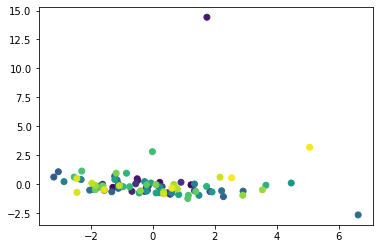

In [22]:
# 2차원 plot
plt.scatter(x=x_pp['PC1'],y=x_pp['PC2'], c = range(0,len(x_pp.index.tolist())))

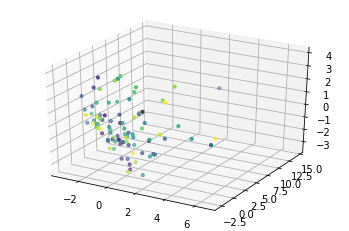

In [23]:
# 3차원 plot
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(x_pp['PC1'],x_pp['PC2'],x_pp['PC3'], s=10, c = range(0,len(x_pp.index.tolist())))
plt.show()

In [24]:
x_pp.describe()

PC1           PC2           PC3           PC4           PC5  \
count  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01   
mean  -7.808162e-17  1.220025e-18  5.856121e-17 -4.010833e-17  2.562053e-17   
std    1.829039e+00  1.696897e+00  1.654969e+00  1.300492e+00  1.254448e+00   
min   -3.203927e+00 -2.644123e+00 -3.359534e+00 -6.333197e+00 -1.655837e+00   
25%   -1.263281e+00 -5.906019e-01 -1.107709e+00 -4.455919e-01 -5.531085e-01   
50%   -2.022794e-01 -2.398572e-01 -2.550154e-01  9.436369e-02 -3.403502e-01   
75%    8.706694e-01  1.119687e-01  6.756028e-01  5.275026e-01  1.124625e-01   
max    6.635317e+00  1.441898e+01  3.869028e+00  6.488150e+00  6.412432e+00   

                PC6  
count  9.100000e+01  
mean   4.148086e-17  
std    1.126846e+00  
min   -1.860328e+00  
25%   -7.919445e-01  
50%    1.653617e-02  
75%    5.256687e-01  
max    5.689226e+00

In [25]:
# Principal Component Pattern Plot 1
plt.scatter(x=x_pp['PC1'],y=x_pp['PC3'])
plt.scatter(x=x_pp.iloc[1,0], y=x_pp.iloc[1,2], marker='D', c='r')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
train_dataset, test_dataset = train_test_split(scaled2, train_size=0.7, test_size=0.3, random_state=311)
train_y = train_dataset[['유동인구']]
test_y = test_dataset[['유동인구']]
train = train_dataset.drop(['유동인구'], axis=1)
test = test_dataset.drop(['유동인구'], axis=1)

In [28]:
#scale_train = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns, index = train.index)
#scale_test = pd.DataFrame(StandardScaler().fit_transform(test), columns=test.columns, index = test.index)

pca = PCA(n_components = t)
pdComp1 = pca.fit_transform(train)
pdComp2 = pca.fit_transform(test)
train_p = pd.DataFrame(data = pdComp1, columns = pc_list)
test_p = pd.DataFrame(data = pdComp2, columns = pc_list)

In [29]:
#scale the training and testing data
X_nopca_train = scale(train)
X_nopca_test = scale(test)

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_nopca_train[:,:], train_y)

#calculate RMSE
pred1 = regr.predict(X_nopca_test)
np.sqrt(mean_squared_error(test_y, pred1))


7.257324928353977

In [30]:
plt.scatter(pred1, test_y, alpha = 0.4)
plt.show()

r2 = r2_score(y_true = test_y, y_pred = pred1)
print('R2 = ', r2)

R2 =  -94.37822468553374


In [31]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(train))
X_reduced_test = pca.transform(scale(test))[:,:]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:], train_y)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(test_y, pred))


0.6542406654419292

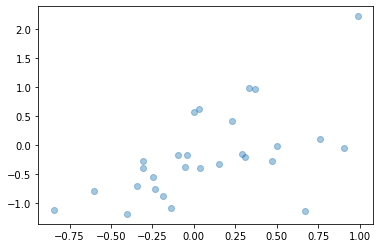

R2 =  0.2248760278788383


In [32]:
plt.scatter(pred, test_y, alpha = 0.4)
plt.show()

r2 = r2_score(y_true = test_y, y_pred = pred)
print('R2 = ', r2)

In [33]:
regr.coef_

array([[ 0.16055849, -0.06265025,  0.02995336, -0.00857878, -0.04755446,
         0.18491758]])

In [34]:
regr.intercept_

array([0.08038602])

In [35]:
train_y_prime = train_y.reset_index()
merge_df = pd.concat([train_p, train_y_prime], axis = 1)
merge_df = merge_df.set_index('index')
print(merge_df)

             PC1       PC2       PC3       PC4       PC5       PC6      유동인구
index                                                                       
마곡역    -0.894000 -1.391341  2.906229  0.080585 -0.627771 -0.113378 -0.745513
합정역    -0.235312  0.361997 -1.972509 -0.261751 -0.614236 -0.454297  1.198539
중랑역    -0.630271 -0.283607 -3.347982 -0.936594 -0.712985 -0.185659 -0.996140
서울역    -0.158433  1.764121 -1.962531 -0.942641  0.486864 -0.944858  2.684440
구로역    -0.300549 -0.872357 -1.465492  0.384212  7.783281  0.323638 -0.275385
...          ...       ...       ...       ...       ...       ...       ...
홍대입구역   4.068211  3.988033 -1.372170  0.133870  0.237980 -1.858518  2.635010
수원시청역  -0.726875  1.150128  2.171024 -1.953737  0.554605  0.759627 -0.545759
영등포구청역 -0.275192  0.523190 -1.254020 -0.509116 -0.357252  0.295957  0.126824
운정역     0.605676 -2.454642 -0.184112  1.020284  0.258858  4.005154 -0.925288
서초역    -0.490579 -1.370250  0.683519  0.672316 -0.307582  0.012343 -0.189295

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
ols('유동인구 ~ PC1', data=merge_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   유동인구   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                  0.003351
Date:                Sat, 18 Jun 2022   Prob (F-statistic):              0.954
Time:                        03:47:52   Log-Likelihood:                -94.552
No. Observations:                  63   AIC:                             193.1
Df Residuals:                      61   BIC:                             197.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0804      0.139      0.578      0.565      -0.197       0.358
PC1           -0.0040      0.069     -0.058      0.954      -0.143       0.135
==============================================================================
Omnibus:                       21.468   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.288
Skew:                           1.435   Prob(JB):                     7.20e-07
Kurtosis:                       4.594   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model = ols('유동인구 ~ PC1', data=merge_df).fit()
sm.stats.anova_lm(model, typ=1)

df     sum_sq   mean_sq         F    PR(>F)
PC1        1.0   0.004077  0.004077  0.003351  0.954026
Residual  61.0  74.210980  1.216573       NaN       NaN

In [39]:
print('{:.20f}'.format(sm.stats.anova_lm(model, typ=1)['PR(>F)'][0]))

0.95402579014052868445


In [40]:
model = ols('유동인구 ~ PC1+PC2+PC3+PC4+PC5+PC6', data=merge_df).fit()
sm.stats.anova_lm(model, typ=1)

df     sum_sq   mean_sq         F    PR(>F)
PC1        1.0   0.004077  0.004077  0.003615  0.952270
PC2        1.0   5.796371  5.796371  5.139512  0.027268
PC3        1.0   0.009147  0.009147  0.008110  0.928563
PC4        1.0   0.416806  0.416806  0.369572  0.545695
PC5        1.0   0.748875  0.748875  0.664010  0.418600
PC6        1.0   4.082669  4.082669  3.620012  0.062235
Residual  56.0  63.157112  1.127806       NaN       NaN

In [41]:
variables = sm.stats.anova_lm(model, typ=1).index.tolist()
pvalues = sm.stats.anova_lm(model, typ=1)['PR(>F)'].tolist()

for variable, pvalue in zip(variables, pvalues):
    
    print(variable, '\t', '{:.20f}'.format(pvalue))

PC1 	 0.95227041618706220749
PC2 	 0.02726758300319416864
PC3 	 0.92856256803740611083
PC4 	 0.54569510613943350563
PC5 	 0.41859970427742265731
PC6 	 0.06223490245066362614
Residual 	 nan
